SecureSwipe Solutions, una empresa de tecnología financiera fundada en 2020, ha experimentado un rápido crecimiento, procesando cientos de miles de transacciones mensuales en Europa. Sin embargo, este auge ha ido acompañado de un incremento en las transacciones fraudulentas, afectando las finanzas y la reputación de la compañía. Su sistema actual de detección de fraude, basado en reglas estáticas, ha demostrado ser ineficaz para detectar patrones sofisticados de fraude, lo que genera falsos positivos y negativos. Ante este problema, SecureSwipe ha decidido implementar un sistema de detección de fraude más avanzado utilizando técnicas de aprendizaje automático, con el objetivo de crear un modelo más preciso y adaptable aprovechando sus vastos datos de transacciones.


Descargamos un dataset de detección de fraude en tarjetas de crédito desde Kaggle e instalamos Optuna, para la optimización de hiperparámetros.

In [ ]:
!pip install kaggle
!kaggle datasets download nelgiriyewithana/credit-card-fraud-detection-dataset-2023
!unzip credit-card-fraud-detection-dataset-2023.zip
#!pip install scikit-learn==1.2.2
!pip install optuna

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
License(s): other
credit-card-fraud-detection-dataset-2023.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  credit-card-fraud-detection-dataset-2023.zip
replace creditcard_2023.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard_2023.csv     


**Librerías**

Importamos las librerías necesarias para el análisis estadístico, visualización y modelos de machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from scipy import stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
%matplotlib inline

# Modelos
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Arboles de decision
from sklearn.linear_model import LogisticRegression # Rectas de Regresion Logistica
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neural_network import MLPClassifier # Redes Neuronales
from sklearn.svm import SVC # Support Vector Machine
from sklearn.naive_bayes import GaussianNB # Naive Bayes

# Metricas
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score # precision
from sklearn.metrics import accuracy_score # exactitud
from sklearn.metrics import recall_score # exhaustividad

# Validacion
from sklearn.model_selection import KFold

Cargamos el dataset

In [ ]:
df = pd.read_csv("creditcard_2023.csv")
df.describe(include = 'all')
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


**Data Missing**

Verificamos si hay datos nulos en el dataset

In [ ]:
print(df.isnull().values.any())

False


Duplicación de datos

Verificamos si hay registros duplicados en el dataset

In [ ]:
print(df.duplicated(subset=['id']).values.any())

False


 **Outliers**

Visualizamos la distribución de la variable "Amount", que representa el monto de las transacciones

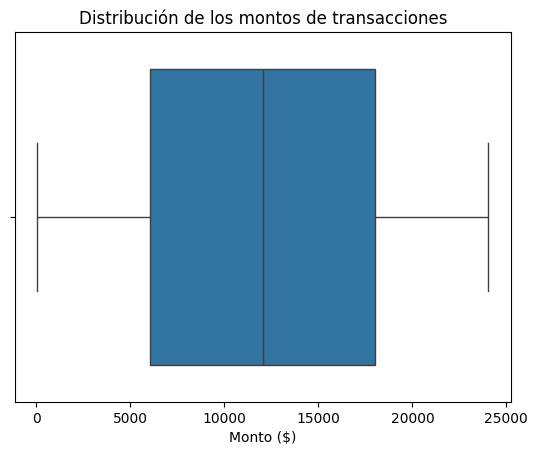

In [ ]:
sb.boxplot(x=df["Amount"])
plt.title("Distribución de los montos de transacciones")
plt.xlabel("Monto ($)")
plt.show()

**Matriz de Correlación**

Graficamos la matriz de correlacíon

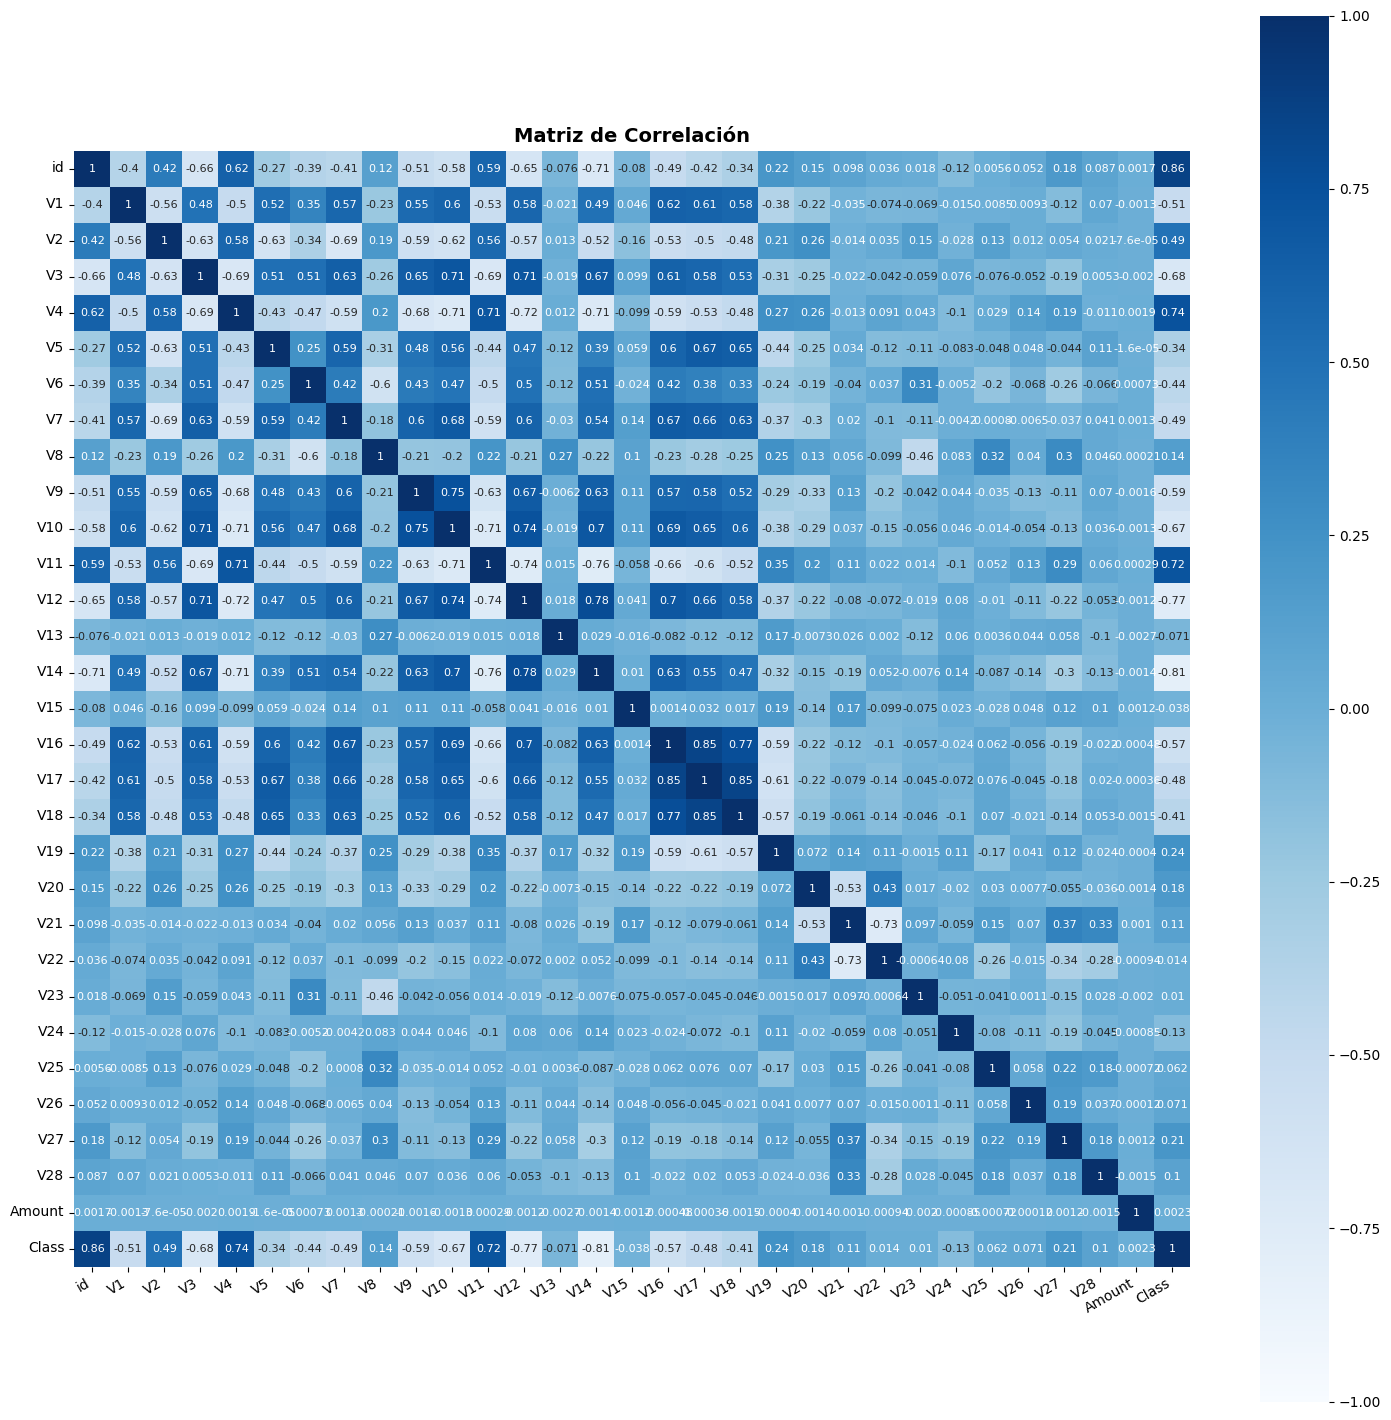

In [ ]:
corr_matrix = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(18, 18))

sb.heatmap(
    corr_matrix,
    annot=True,
    cbar=True,  # Mostrar barra de color
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap='Blues',  # Cambiar paleta de colores
    square=True,
    ax=ax
)

ax.set_title("Matriz de Correlación", fontsize=14, fontweight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.show()

**Modelo de predicción**

Entrenamos y optimizamos el modelo de predicción de fraudes

In [ ]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
!pip install scikit-learn==1.1.3
#!pip install optuna  # Suponiendo que scikit-learn ya está instalado

import random

# Importar la clase necesaria
from sklearn.preprocessing import RobustScaler

# Importar xgboost
import xgboost as xgb

# Importar las bibliotecas necesarias para la optimización de hiperparámetros y evaluación del modelo
import optuna
from sklearn.model_selection import cross_val_score, KFold, train_test_split
import logging
import sys
import joblib

# Crear una semilla aleatoria determinista para la reproducibilidad
random.seed(42)

# Extraer las características (predictores) y la variable objetivo (etiqueta)
X_ccfdd = df.drop(['id', 'Class'], axis=1)
y_ccfdd = df['Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_ccfdd, y_ccfdd, test_size=0.2, random_state=42)

# Escalar las características utilizando RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def objective(trial):
  """
  Función objetivo para la optimización de hiperparámetros
  """
  # Definir los hiperparámetros a optimizar
  param = {
      'max_depth': trial.suggest_int('max_depth', 1, 9),  # Se recomienda 15
      'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
      'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
      'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
      'subsample': trial.suggest_float('subsample', 0.5, 1.0),
      'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
      'tree_method': 'hist',  # 'hist' para Kaggle
  }

  # Crear un clasificador XGBoost con los hiperparámetros sugeridos
  model = xgb.XGBClassifier(**param)

  # Entrenar el modelo
  model.fit(X_train_scaled, y_train)

  # Realizar predicciones en el conjunto de validación (una porción de los datos de entrenamiento)
  y_pred = model.predict(X_train_scaled)

  # Evaluar el rendimiento del modelo utilizando ROC AUC (Área bajo la curva ROC)
  # Esta métrica es recomendada para problemas de clasificación binaria.
  cv = KFold(n_splits=5, shuffle=True, random_state=42)
  score = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='roc_auc')

  # Devolver la puntuación promedio de ROC AUC
  return score.mean()

# Configurar los registros para mostrar mensajes
optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))

# Crear un estudio para la optimización de hiperparámetros
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner())

# Optimizar la función objetivo con 10 intentos
study.optimize(objective, n_trials=10)

# Obtener el mejor intento y sus hiperparámetros
best_trial = study.best_trial
best_params = best_trial.params

# Crear un nuevo clasificador XGBoost con los mejores hiperparámetros
best_model = xgb.XGBClassifier(**best_params)

# Entrenar el mejor modelo en todo el conjunto de entrenamiento
best_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred_test = best_model.predict(X_test_scaled)

# Ahora puedes evaluar el rendimiento del mejor modelo en el conjunto de prueba
# utilizando métricas como exactitud, precisión, recall o puntuación F1

[I 2025-01-30 19:55:13,819] A new study created in memory with name: no-name-7c4bd634-d9c3-4501-8281-a9b1d2878ddc


A new study created in memory with name: no-name-7c4bd634-d9c3-4501-8281-a9b1d2878ddc


[I 2025-01-30 19:57:56,552] Trial 0 finished with value: 0.9991973994023831 and parameters: {'max_depth': 6, 'learning_rate': 0.011214290045115063, 'n_estimators': 306, 'min_child_weight': 3, 'subsample': 0.7437983066505766, 'colsample_bytree': 0.8980312030499502}. Best is trial 0 with value: 0.9991973994023831.


Trial 0 finished with value: 0.9991973994023831 and parameters: {'max_depth': 6, 'learning_rate': 0.011214290045115063, 'n_estimators': 306, 'min_child_weight': 3, 'subsample': 0.7437983066505766, 'colsample_bytree': 0.8980312030499502}. Best is trial 0 with value: 0.9991973994023831.


[I 2025-01-30 19:58:50,402] Trial 1 finished with value: 0.9897748049766815 and parameters: {'max_depth': 3, 'learning_rate': 0.015857091767156314, 'n_estimators': 122, 'min_child_weight': 10, 'subsample': 0.5499368506762755, 'colsample_bytree': 0.8352623995831295}. Best is trial 0 with value: 0.9991973994023831.


Trial 1 finished with value: 0.9897748049766815 and parameters: {'max_depth': 3, 'learning_rate': 0.015857091767156314, 'n_estimators': 122, 'min_child_weight': 10, 'subsample': 0.5499368506762755, 'colsample_bytree': 0.8352623995831295}. Best is trial 0 with value: 0.9991973994023831.


[I 2025-01-30 20:02:37,941] Trial 2 finished with value: 0.9999105753001066 and parameters: {'max_depth': 8, 'learning_rate': 0.01422097226127674, 'n_estimators': 338, 'min_child_weight': 1, 'subsample': 0.5350579260529802, 'colsample_bytree': 0.8173185854945613}. Best is trial 2 with value: 0.9999105753001066.


Trial 2 finished with value: 0.9999105753001066 and parameters: {'max_depth': 8, 'learning_rate': 0.01422097226127674, 'n_estimators': 338, 'min_child_weight': 1, 'subsample': 0.5350579260529802, 'colsample_bytree': 0.8173185854945613}. Best is trial 2 with value: 0.9999105753001066.


[I 2025-01-30 20:07:58,893] Trial 3 finished with value: 0.9987768373425912 and parameters: {'max_depth': 5, 'learning_rate': 0.00601189745528678, 'n_estimators': 751, 'min_child_weight': 2, 'subsample': 0.5591769649933778, 'colsample_bytree': 0.7670492841123248}. Best is trial 2 with value: 0.9999105753001066.


Trial 3 finished with value: 0.9987768373425912 and parameters: {'max_depth': 5, 'learning_rate': 0.00601189745528678, 'n_estimators': 751, 'min_child_weight': 2, 'subsample': 0.5591769649933778, 'colsample_bytree': 0.7670492841123248}. Best is trial 2 with value: 0.9999105753001066.


[I 2025-01-30 20:09:20,591] Trial 4 finished with value: 0.9998607463153893 and parameters: {'max_depth': 8, 'learning_rate': 0.037722548493029376, 'n_estimators': 103, 'min_child_weight': 7, 'subsample': 0.7009485431258782, 'colsample_bytree': 0.8445183962577469}. Best is trial 2 with value: 0.9999105753001066.


Trial 4 finished with value: 0.9998607463153893 and parameters: {'max_depth': 8, 'learning_rate': 0.037722548493029376, 'n_estimators': 103, 'min_child_weight': 7, 'subsample': 0.7009485431258782, 'colsample_bytree': 0.8445183962577469}. Best is trial 2 with value: 0.9999105753001066.


[I 2025-01-30 20:11:37,140] Trial 5 finished with value: 0.9917189257656374 and parameters: {'max_depth': 3, 'learning_rate': 0.0072458284654842355, 'n_estimators': 408, 'min_child_weight': 3, 'subsample': 0.8924084513999917, 'colsample_bytree': 0.9372185966692606}. Best is trial 2 with value: 0.9999105753001066.


Trial 5 finished with value: 0.9917189257656374 and parameters: {'max_depth': 3, 'learning_rate': 0.0072458284654842355, 'n_estimators': 408, 'min_child_weight': 3, 'subsample': 0.8924084513999917, 'colsample_bytree': 0.9372185966692606}. Best is trial 2 with value: 0.9999105753001066.


[I 2025-01-30 20:13:30,789] Trial 6 finished with value: 0.9942715002120284 and parameters: {'max_depth': 5, 'learning_rate': 0.0024997968720526305, 'n_estimators': 267, 'min_child_weight': 7, 'subsample': 0.8337630622520494, 'colsample_bytree': 0.6438951891618374}. Best is trial 2 with value: 0.9999105753001066.


Trial 6 finished with value: 0.9942715002120284 and parameters: {'max_depth': 5, 'learning_rate': 0.0024997968720526305, 'n_estimators': 267, 'min_child_weight': 7, 'subsample': 0.8337630622520494, 'colsample_bytree': 0.6438951891618374}. Best is trial 2 with value: 0.9999105753001066.


[I 2025-01-30 20:18:09,239] Trial 7 finished with value: 0.9979398895430007 and parameters: {'max_depth': 6, 'learning_rate': 0.0024635264566489038, 'n_estimators': 594, 'min_child_weight': 10, 'subsample': 0.8529734376977184, 'colsample_bytree': 0.6049707445633625}. Best is trial 2 with value: 0.9999105753001066.


Trial 7 finished with value: 0.9979398895430007 and parameters: {'max_depth': 6, 'learning_rate': 0.0024635264566489038, 'n_estimators': 594, 'min_child_weight': 10, 'subsample': 0.8529734376977184, 'colsample_bytree': 0.6049707445633625}. Best is trial 2 with value: 0.9999105753001066.


[I 2025-01-30 20:19:46,506] Trial 8 finished with value: 0.9720670626418423 and parameters: {'max_depth': 1, 'learning_rate': 0.001743997207398074, 'n_estimators': 456, 'min_child_weight': 8, 'subsample': 0.8029418573838807, 'colsample_bytree': 0.9699337005906692}. Best is trial 2 with value: 0.9999105753001066.


Trial 8 finished with value: 0.9720670626418423 and parameters: {'max_depth': 1, 'learning_rate': 0.001743997207398074, 'n_estimators': 456, 'min_child_weight': 8, 'subsample': 0.8029418573838807, 'colsample_bytree': 0.9699337005906692}. Best is trial 2 with value: 0.9999105753001066.


[I 2025-01-30 20:23:53,849] Trial 9 finished with value: 0.9882202256770771 and parameters: {'max_depth': 2, 'learning_rate': 0.002942508588118984, 'n_estimators': 886, 'min_child_weight': 10, 'subsample': 0.5342724833404594, 'colsample_bytree': 0.6545207831580611}. Best is trial 2 with value: 0.9999105753001066.


Trial 9 finished with value: 0.9882202256770771 and parameters: {'max_depth': 2, 'learning_rate': 0.002942508588118984, 'n_estimators': 886, 'min_child_weight': 10, 'subsample': 0.5342724833404594, 'colsample_bytree': 0.6545207831580611}. Best is trial 2 with value: 0.9999105753001066.


In [ ]:
import joblib
from google.colab import drive



# Montar Google Drive
drive.mount('/content/drive')

# Ruta donde guardar el modelo en Google Drive
ruta_en_drive = '/content/drive/MyDrive/modelo_optimo.joblib'

# Guardar el modelo
joblib.dump(best_model, ruta_en_drive)




Mounted at /content/drive


['/content/drive/MyDrive/modelo_optimo.joblib']

In [ ]:
# Guardar el modelo
##joblib.dump(best_model, 'modelo_optimo.joblib')

# Inicializar Git
##!git init
##!git config --global user.email "jorge.gnr@gmail.com"
##!git config --global user.name "jorgeperez23"

# Agregar archivos
##!git add .

# Commit
##!git commit -m "Primer commit: Modelo entrenado y código"

# Conectar con GitHub
##!git remote add origin https://github.com/No-Country-simulation/equipo-c23-13-data.git #https://github.com/jorgeperez23/equipo-c23-13-data-personal.git

# Push
##!git push -u origin main

In [ ]:
#Extraer predictores y etiquetas
X_ccfdd = df.drop(['id', 'Class'], axis=1)
y_ccfdd = df['Class']

#Dividir los datos en conjuntos de entrenamiento y prueba
X_ccfdd_entr, X_ccfdd_prb, y_ccfdd_entr, y_ccfdd_prb = train_test_split(X_ccfdd, y_ccfdd, test_size=0.2, random_state=42)

#Escalar predictores utilizando un escalador robusto
escalador = RobustScaler()
X_ccfdd_entr_esc = escalador.fit_transform(X_ccfdd_entr)
X_ccfdd_prb_esc = escalador.transform(X_ccfdd_prb) #utilizar la transformacion para evitar la filtracion de datos

import joblib
from google.colab import drive
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score

# Montar Google Drive
drive.mount('/content/drive')

# Ruta donde guardaste el modelo
ruta_en_drive = '/content/drive/MyDrive/modelo_optimo.joblib'


#Para cargar el modelo en una nueva sesion
modelo_optimo_cargado = joblib.load(ruta_en_drive)

#Evaluar el mejor modelo en el conjunto de prueba
y_pred_prb = modelo_optimo_cargado.predict(X_ccfdd_prb_esc)
auc_roc_prb = roc_auc_score(y_ccfdd_prb, y_pred_prb)
sensibilidad_prb = recall_score(y_ccfdd_prb, y_pred_prb)
precision_prb = precision_score(y_ccfdd_prb, y_pred_prb)
f1_prb = f1_score(y_ccfdd_prb, y_pred_prb)
print('Puntuación AUC-ROC en el conjunto de prueba:', auc_roc_prb)
print('Puntuación sensibilidad en el conjunto de prueba:', sensibilidad_prb)
print('Puntuación precisión en el conjunto de prueba:', precision_prb)
print('Puntuación f1 en el conjunto de prueba::', f1_prb)

#Crear un DataFrame con las predicciones
resultados = pd.DataFrame({'predicciones': y_pred_prb})

# Guardar las predicciones en un archivo CSV
resultados.to_csv('resultados.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Puntuación AUC-ROC en el conjunto de prueba: 0.9977471494296385
Puntuación sensibilidad en el conjunto de prueba: 0.9986661050266779
Puntuación precisión en el conjunto de prueba: 0.9968465311843028
Puntuación f1 en el conjunto de prueba:: 0.9977554885319493


<ipython-input-15-cf0f10511711>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=y_ccfdd, palette=["blue", "red"])


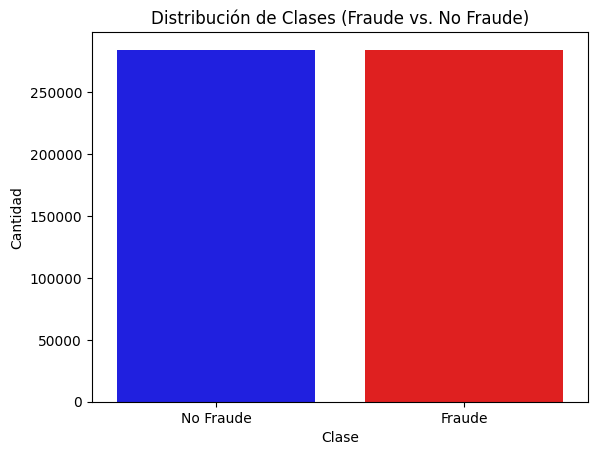

In [ ]:
sb.countplot(x=y_ccfdd, palette=["blue", "red"])
plt.title("Distribución de Clases (Fraude vs. No Fraude)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(ticks=[0, 1], labels=["No Fraude", "Fraude"])
plt.show()


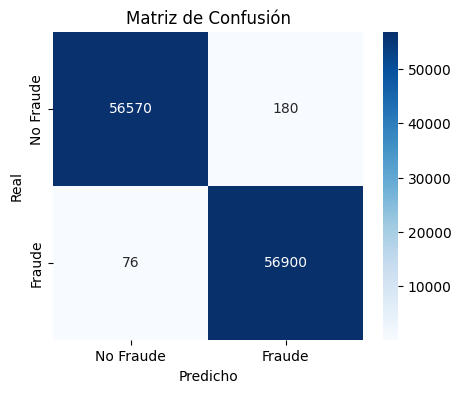

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5, 4))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

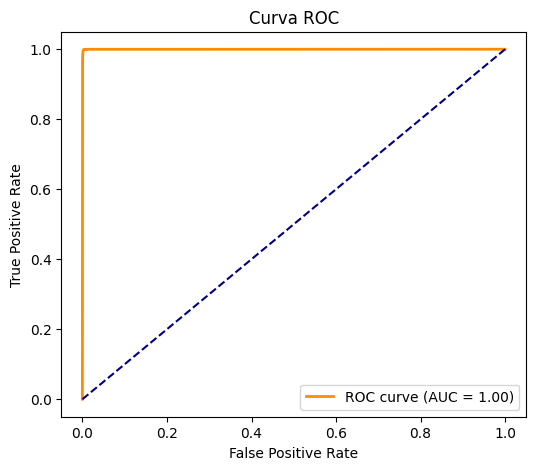

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades de predicción
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

<ipython-input-21-4209afd37e0b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=metrics, y=scores, palette="viridis")


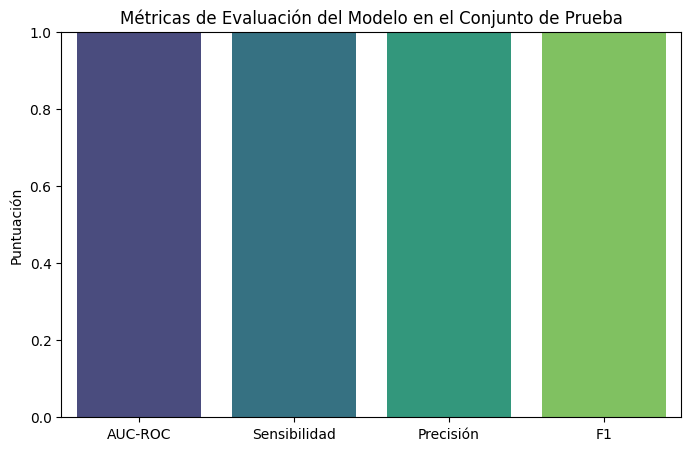

In [ ]:
metrics = ['AUC-ROC', 'Sensibilidad', 'Precisión', 'F1']
scores = [auc_roc_prb, sensibilidad_prb, precision_prb, f1_prb]

plt.figure(figsize=(8, 5))
sb.barplot(x=metrics, y=scores, palette="viridis")
plt.title("Métricas de Evaluación del Modelo en el Conjunto de Prueba")
plt.ylabel("Puntuación")
plt.ylim(0, 1)  # Limitar la escala de 0 a 1
plt.show()

<ipython-input-22-6c41b0566a2d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Importancia', y='Característica', data=importance_df, palette='viridis')


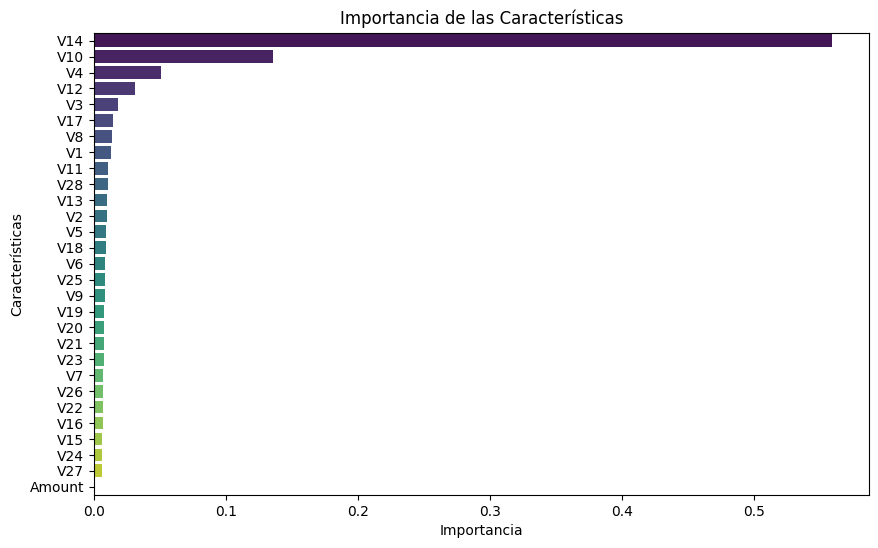

In [ ]:
# Obtener importancia de características
importances = modelo_optimo_cargado.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_names = X_ccfdd.columns
importance_df = pd.DataFrame({'Característica': feature_names, 'Importancia': importances})

# Ordenar por importancia
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sb.barplot(x='Importancia', y='Característica', data=importance_df, palette='viridis')
plt.title("Importancia de las Características")
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

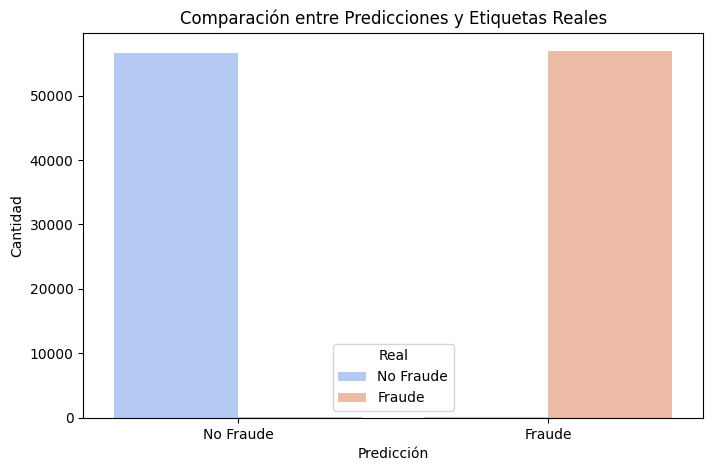

In [ ]:
plt.figure(figsize=(8, 5))
sb.countplot(x='Predicción', hue='Real', data=pd.DataFrame({'Real': y_ccfdd_prb, 'Predicción': y_pred_prb}), palette='coolwarm')
plt.title("Comparación entre Predicciones y Etiquetas Reales")
plt.xlabel("Predicción")
plt.ylabel("Cantidad")
plt.xticks(ticks=[0, 1], labels=["No Fraude", "Fraude"])
plt.legend(title="Real", labels=["No Fraude", "Fraude"])
plt.show()


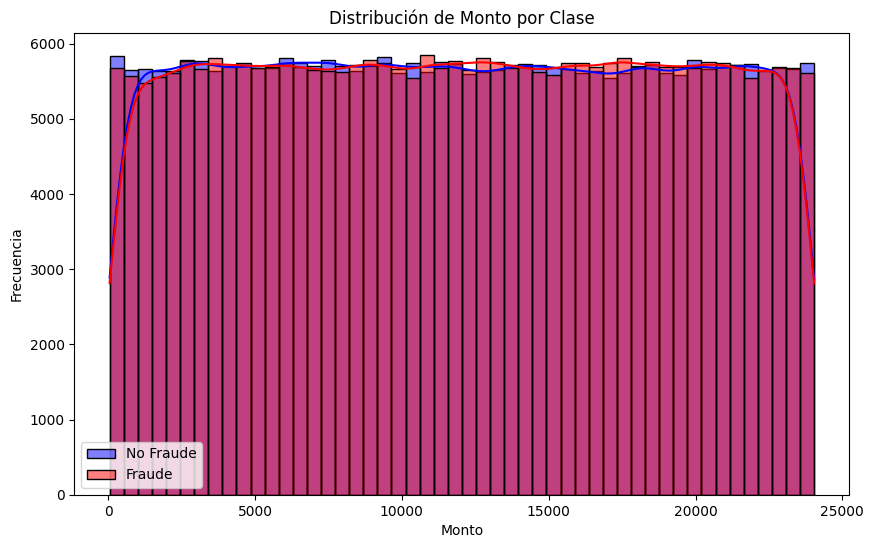

In [ ]:
plt.figure(figsize=(10, 6))
sb.histplot(df[df['Class'] == 0]["Amount"], color='blue', kde=True, label="No Fraude", bins=50)
sb.histplot(df[df['Class'] == 1]["Amount"], color='red', kde=True, label="Fraude", bins=50)
plt.title("Distribución de Monto por Clase")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()